# Dataset and Problem Description

This dataset is collected from National Health Insurance Service in Korea.


We're are going to do the following analysis on this dataset.
1. Data Processing
2. EDA
3. Classification of Smoker or not a Smoker.
  > This will be done by using the Body Signal attributes that the dataset offers such as Blood Pressure, Protein in urine etc.


# Research Papers
1. https://www.diva-portal.org/smash/get/diva2:1537520/FULLTEXT01.pdf
>A study in alcohol: A comparison of data mining methods for identifying binge drinking risk factors in university students

2. https://ieeexplore.ieee.org/document/8869001
>A Comparative Study of Lung Cancer Detection using Machine Learning Algorithms.s.


In [ ]:
# To mount your Google Drive on your runtime using an authorization code
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Data Mining')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#imports
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
dataset = pd.read_csv('smokingdrinkingdataset.csv')
dataset.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  

[5 rows x 24 columns]

# Data Preprocessing

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
dataset.describe().T

count        mean         std    min    25%    50%  \
age               991346.0   47.614491   14.181339   20.0   35.0   45.0   
height            991346.0  162.240625    9.282957  130.0  155.0  160.0   
weight            991346.0   63.284050   12.514241   25.0   55.0   60.0   
waistline         991346.0   81.233358   11.850323    8.0   74.1   81.0   
sight_left        991346.0    0.980834    0.605949    0.1    0.7    1.0   
sight_right       991346.0    0.978429    0.604774    0.1    0.7    1.0   
hear_left         991346.0    1.031495    0.174650    1.0    1.0    1.0   
hear_right        991346.0    1.030476    0.171892    1.0    1.0    1.0   
SBP               991346.0  122.432498   14.543148   67.0  112.0  120.0   
DBP               991346.0   76.052627    9.889365   32.0   70.0   76.0   
BLDS              991346.0  100.424447   24.179960   25.0   88.0   96.0   
tot_chole         991346.0  195.557020   38.660155   30.0  169.0  193.0   
HDL_chole         991346.0   56.936800   17.238479    1.0   46.0   55.0   
LDL_chole         991346.0  113.037692   35.842812    1.0   89.0  111.0   
triglyceride      991346.0  132.141751  102.196985    1.0   73.0  106.0   
hemoglobin        991346.0   14.229824    1.584929    1.0   13.2   14.3   
urine_protein     991346.0    1.094224    0.437724    1.0    1.0    1.0   
serum_creatinine  991346.0    0.860467    0.480530    0.1    0.7    0.8   
SGOT_AST          991346.0   25.989308   23.493386    1.0   19.0   23.0   
SGOT_ALT          991346.0   25.755051   26.308599    1.0   15.0   20.0   
gamma_GTP         991346.0   37.136347   50.424153    1.0   16.0   23.0   
SMK_stat_type_cd  991346.0    1.608122    0.818507    1.0    1.0    1.0   

                    75%     max  
age                60.0    85.0  
height            170.0   190.0  
weight             70.0   140.0  
waistline          87.8   999.0  
sight_left          1.2     9.9  
sight_right         1.2     9.9  
hear_left           1.0     2.0  
hear_right          1.0     2.0  
SBP               131.0   273.0  
DBP                82.0   185.0  
BLDS              105.0   852.0  
tot_chole         219.0  2344.0  
HDL_chole          66.0  8110.0  
LDL_chole         135.0  5119.0  
triglyceride      159.0  9490.0  
hemoglobin         15.4    25.0  
urine_protein       1.0     6.0  
serum_creatinine    1.0    98.0  
SGOT_AST           28.0  9999.0  
SGOT_ALT           29.0  7210.0  
gamma_GTP          39.0   999.0  
SMK_stat_type_cd    2.0     3.0

In [ ]:
dataset[dataset['sex'] == 'Male'].max()

sex                   Male
age                     85
height                 190
weight                 140
waistline            145.0
sight_left             9.9
sight_right            9.9
hear_left              2.0
hear_right             2.0
SBP                  253.0
DBP                  185.0
BLDS                 852.0
tot_chole           2344.0
HDL_chole            658.0
LDL_chole           2254.0
triglyceride        6430.0
hemoglobin            24.2
urine_protein          6.0
serum_creatinine      98.0
SGOT_AST            9999.0
SGOT_ALT            4633.0
gamma_GTP            999.0
SMK_stat_type_cd       3.0
DRK_YN                   Y
dtype: object

In [ ]:
dataset.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [ ]:
dataset.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

For our Classification Problem, We'll find out whether a person is a drinker or not. This is given by the attribute **DRK_YN** where value 1 is for Yes person is a Drinker and 0 is for Not a Drinker.

There are 6 categorical and 18 numerical variables in our dataset.
We'll encode the categorial values with numerical values.

In [ ]:
numerical_cols = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
categorical_cols = ['sex', 'DRK_YN', 'hear_left', 'hear_right', 'urine_protein', 'SMK_stat_type_cd']

In [ ]:
dataset['DRK_YN'].replace({'Y':1, 'N':0}, inplace = True)
dataset['sex'].replace({"Male": 1, "Female": 0}, inplace = True)
dataset['SMK_stat_type_cd'].replace({1: 0, 2: 1, 3: 2}, inplace = True)

There are some duplicate values, but because the dataset have larger number of rows, we will simply drop the duplicate values.

In [ ]:
dataset.drop_duplicates(inplace = True)

Fixing Outliers

In [ ]:
#Detecting which cols have outliers
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  IQR = quartile3 - quartile1
  up_limit = quartile3 + (1.5*IQR)
  low_limit = quartile1 - (1.5*IQR)
  return low_limit, up_limit

def check_outlier(dataset, col_name):
  low_limit, up_limit = outlier_thresholds(dataset, col_name)
  if dataset[(dataset[col_name] > up_limit) | (dataset[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

outlier_cols = []
for col in numerical_cols:
  if check_outlier(dataset, col):
    outlier_cols.append(col)
    print(col)

waistline
sight_left
sight_right
SBP
DBP
BLDS
tot_chole
HDL_chole
LDL_chole
triglyceride
hemoglobin
serum_creatinine
SGOT_AST
SGOT_ALT
gamma_GTP


In [ ]:
dataset['waistline'].values

array([72., 81., 81., ..., 80., 83., 83.])

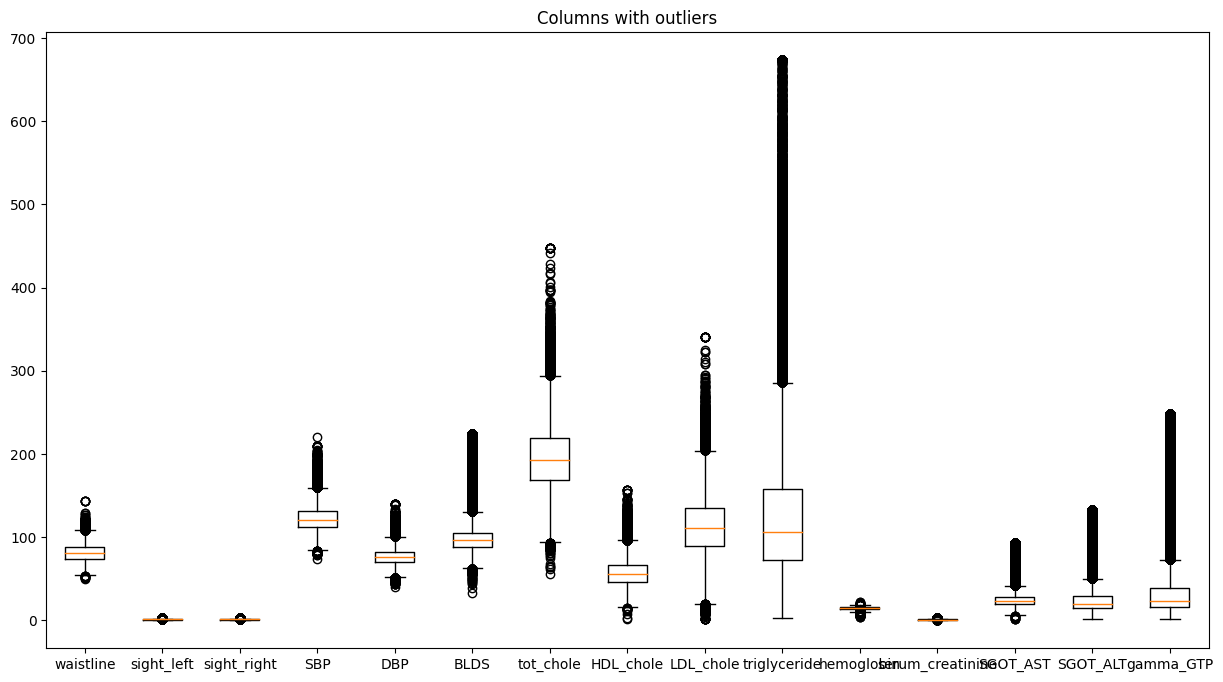

In [ ]:
box_dict = {}
for i in range(0,len(outlier_cols)):
  box_dict[outlier_cols[i]] = dataset[outlier_cols[i]].values

plt.figure(figsize=(15, 8))
plt.boxplot(box_dict.values(), labels=box_dict.keys())
plt.title('Columns with outliers')
plt.show()

In [ ]:
#fix outliers by winsorizing
def winsorize(dataframe, col_name, lower_quantile, upper_quantile):
  lower_limit, upper_limit = outlier_thresholds(dataframe, col_name, q1=lower_quantile, q3=upper_quantile)
  dataframe[col_name] = dataframe[col_name].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

for col in outlier_cols:
  winsorize(dataset, col, 0.05, 0.95)

Since we have Height and Weight in our data, we can create a BMI column and a BMI_Category column.

In [ ]:
dataset['BMI'] = dataset['weight'] / ((dataset['height'] / 100) ** 2)
conditions = [
    (dataset['BMI'] < 18.5),  #Underweight
    (dataset['BMI'] >= 18.5) & (dataset['BMI'] < 25),  #Normal
    (dataset['BMI'] >= 25) & (dataset['BMI'] < 30),  #Overweight
    (dataset['BMI'] >= 30)]  #Obese

dataset['BMI_Category'] = pd.cut(dataset['BMI'], bins=[0, 18.5, 25, 30, float('inf')], labels=[0, 1, 2, 3])

# EDA

In [ ]:
dataset.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    1   35     170      75       90.0         1.0          1.0        1.0   
1    1   30     180      80       89.0         0.9          1.2        1.0   
2    1   40     165      75       91.0         1.2          1.5        1.0   
3    1   50     175      80       91.0         1.5          1.2        1.0   
4    1   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  hemoglobin  urine_protein  serum_creatinine  \
0         1.0  120.0  ...        17.1            1.0               1.0   
1         1.0  130.0  ...        15.8            1.0               0.9   
2         1.0  120.0  ...        15.8            1.0               0.9   
3         1.0  145.0  ...        17.6            1.0               1.1   
4         1.0  138.0  ...        13.8            1.0               0.8   

   SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN        BMI  \
0      21.0      35.0       40.0               0.0       1  25.951557   
1      20.0      36.0       27.0               2.0       0  24.691358   
2      47.0      32.0       68.0               0.0       0  27.548209   
3      29.0      34.0       18.0               0.0       0  26.122449   
4      19.0      12.0       25.0               0.0       0  22.038567   

   BMI_Category  
0             2  
1             1  
2             2  
3             2  
4             1  

[5 rows x 26 columns]

In [ ]:
fig = px.histogram(dataset, x="age", color="DRK_YN")
fig.show()

In [ ]:
import plotly.express as px
dataset_pie = dataset['SMK_stat_type_cd'].replace({0:'never', 1: 'used to smoke but quit', 2: 'smoker'})
fig = px.pie(dataset_pie, names='SMK_stat_type_cd',title = 'Smoker Distribution')
fig.show()

In [ ]:
dataset_pie2 = dataset['DRK_YN'].replace({0:'Non Drinker', 1: 'Drinker'})
fig = px.pie(dataset_pie2, names='DRK_YN',title = 'Drinker Distribution')
fig.show()

In [ ]:
dataset['age'].describe()

count    991320.000000
mean         47.614529
std          14.181346
min          20.000000
25%          35.000000
50%          45.000000
75%          60.000000
max          85.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(dataset, x="weight", color="DRK_YN")
fig.show()

In [ ]:
import pandas as pd
import numpy as np
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-80-913ae4f365e1>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# Modelling

Feature encoding and transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Processing Million Samples is v slow therefore we'll worth with a subset of the dataset
dataset = dataset.sample(n=100000)

columns_to_scale = dataset.columns.difference(["DRK_YN", "SMK_stat_type_cd",'sex']) #as we already encoded these above

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(dataset[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_dataset = dataset.copy()
scaled_dataset = scaled_dataset.reset_index(drop=True)
scaled_dataset[columns_to_scale] = scaled_df
scaled_dataset.head()

sex       age    height  weight  waistline  sight_left  sight_right  \
0    0  0.615385  0.250000    0.15   0.235294    0.131148     0.131148   
1    1  0.615385  0.666667    0.25   0.331551    0.131148     0.131148   
2    0  0.307692  0.333333    0.30   0.331551    0.360656     0.360656   
3    0  0.384615  0.416667    0.15   0.160428    0.459016     0.459016   
4    0  0.923077  0.333333    0.30   0.406417    0.196721     0.360656   

   hear_left  hear_right       SBP  ...  hemoglobin  urine_protein  \
0        0.0         0.0  0.383562  ...    0.466667            0.0   
1        0.0         0.0  0.472603  ...    0.536232            0.0   
2        0.0         0.0  0.267123  ...    0.460870            0.0   
3        0.0         0.0  0.246575  ...    0.594203            0.0   
4        0.0         0.0  0.493151  ...    0.547826            0.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  \
0              0.35  0.284153  0.197719   0.048682               0.0       0   
1              0.40  0.196721  0.114068   0.133874               1.0       0   
2              0.30  0.163934  0.083650   0.040568               0.0       0   
3              0.35  0.185792  0.114068   0.081136               0.0       0   
4              0.40  0.546448  0.258555   0.389452               0.0       1   

        BMI  BMI_Category  
0  0.262484      0.333333  
1  0.185332      0.333333  
2  0.433692      0.666667  
3  0.175553      0.333333  
4  0.433692      0.666667  

[5 rows x 26 columns]

Model for Drinker or Not (2 Class)

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
Y = scaled_dataset["DRK_YN"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

----------- DecisionTreeClassifier -----------



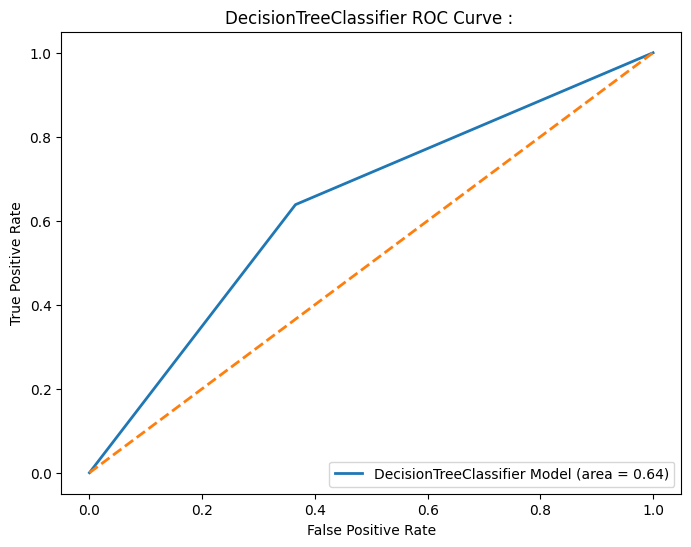

              precision    recall  f1-score     support
Yes            0.635660  0.634513  0.635086   9973.0000
No             0.637133  0.638277  0.637704  10027.0000
accuracy       0.636400  0.636400  0.636400      0.6364
macro avg      0.636397  0.636395  0.636395  20000.0000
weighted avg   0.636399  0.636400  0.636399  20000.0000


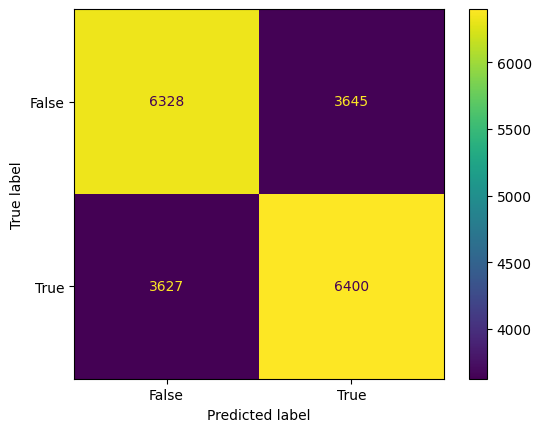

<Figure size 800x600 with 0 Axes>

----------- LogisticRegression -----------



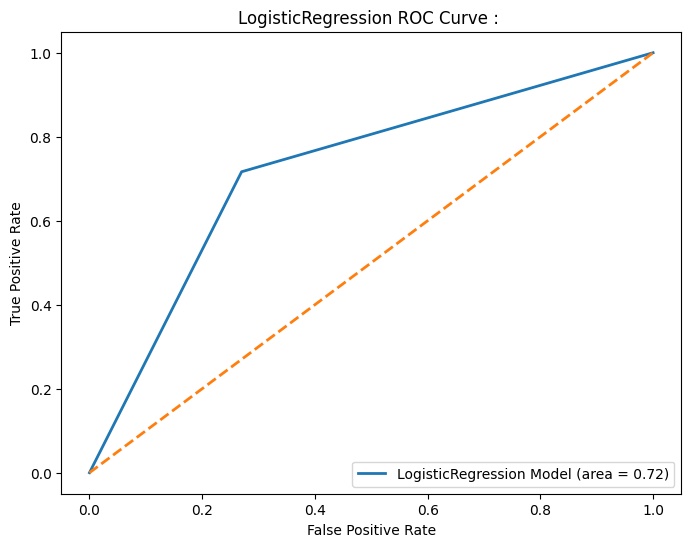

              precision    recall  f1-score     support
Yes            0.719253  0.730071  0.724622   9973.0000
No             0.727448  0.716565  0.721965  10027.0000
accuracy       0.723300  0.723300  0.723300      0.7233
macro avg      0.723350  0.723318  0.723294  20000.0000
weighted avg   0.723361  0.723300  0.723290  20000.0000


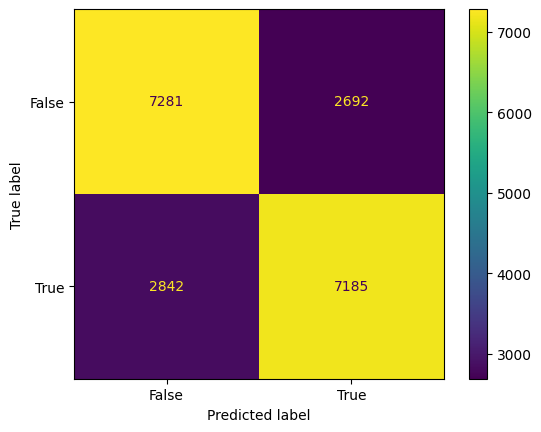

<Figure size 800x600 with 0 Axes>

----------- RandomForestClassifier -----------



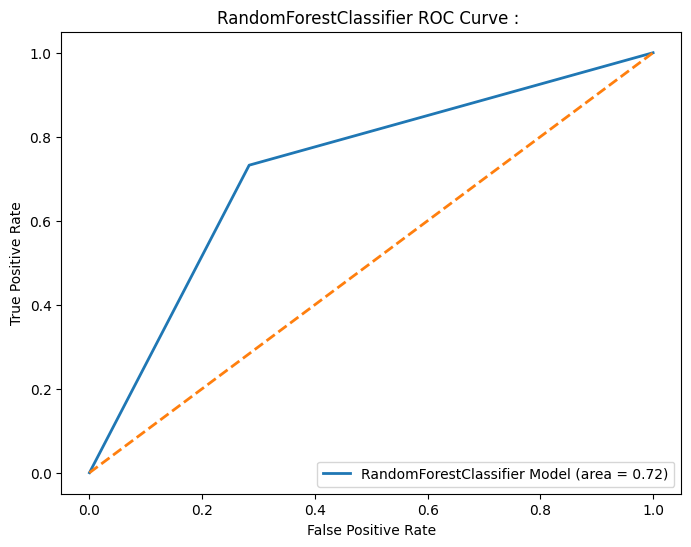

              precision    recall  f1-score      support
Yes            0.726912  0.716635  0.721737   9973.00000
No             0.722069  0.732223  0.727111  10027.00000
accuracy       0.724450  0.724450  0.724450      0.72445
macro avg      0.724491  0.724429  0.724424  20000.00000
weighted avg   0.724484  0.724450  0.724431  20000.00000


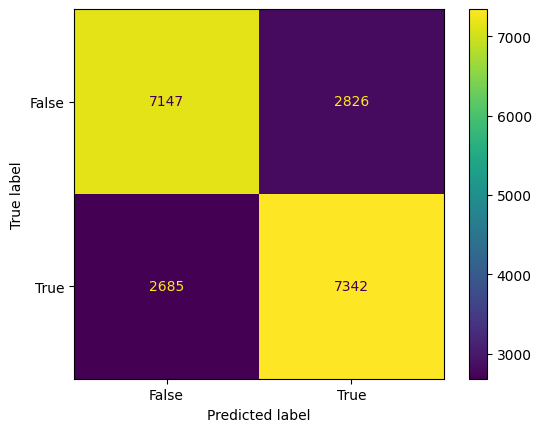

<Figure size 800x600 with 0 Axes>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,auc,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

def models_drinking(models, X_train, X_test, Y_train, Y_test):
  results = {}

  for model_name, model_conf in models.items():
    model = models[model_name]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    print("-----------",model_name,"-----------\n")

    #Roc curve
    fpr, tpr, _ = roc_curve(Y_test, Y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} Model (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve : ')
    plt.legend(loc='lower right')
    plt.show()

    #Classifcation report
    report = classification_report(Y_test, Y_pred, target_names=["Yes","No"], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print(report_df)

    #Confusion matrix
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.figure(figsize=(8, 6))
    plt.show()

classification_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=50, n_jobs=-1),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
}


models_drinking(classification_models, X_train, X_test, Y_train, Y_test)

Model for Smoker type (3 Class)

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
Y = scaled_dataset["DRK_YN"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,roc_curve,auc,f1_score,ConfusionMatrixDisplay
def models_smoker(models, X_train, X_test, Y_train, Y_test):
  results = {}

  for model_name, model_conf in models.items():
    model = models[model_name]
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    Y_prob = model.predict_proba(X_test)

    print("-----------",model_name,"-----------\n")

    #Roc curve
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):
      fpr[i], tpr[i], _ = roc_curve(Y_test, Y_prob[:, i], pos_label=i)
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(8, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve : ')
    plt.legend(loc="lower right")
    plt.show()

    #Metrics
    auc_roc = roc_auc_score(Y_test, Y_prob, multi_class='ovr')
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=1)  # Specify 'weighted' averaging
    recall = recall_score(Y_test, Y_pred, average='weighted')  # Specify 'weighted' averaging
    f1 = f1_score(Y_test, Y_pred, average='weighted')
    results[model_name] = {
            'ROC AUC': auc_roc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
        }

    print(f"Model: {model_name}")
    print(f"ROC AUC: {auc_roc}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")


classification_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=50,n_jobs=-1),
    'RandomForestClassifier': RandomForestClassifier(n_jobs=-1),
}

models_smoker(classification_models, X_train, X_test, Y_train, Y_test)

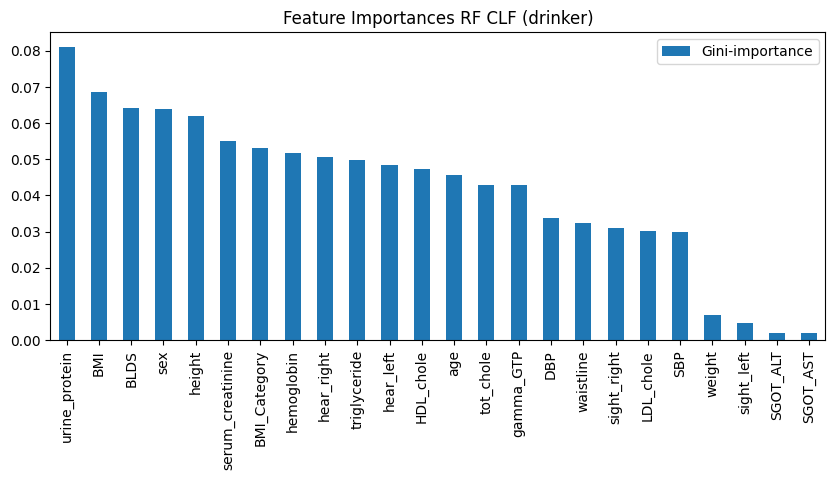

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
Y = scaled_dataset["DRK_YN"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
feats = {}
drinking_model = {
    RandomForestClassifier : model
    }
# Access and collect feature importances for each individual classifier
for clf_name, clf in drinking_model.items():
  for feature, importance in zip(dataset.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
    if feature in feats:
      feats[feature] += importance
    else:
       feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar',figsize=(10, 4))
plt.title('Feature Importances RF CLF (drinker)')
plt.show()

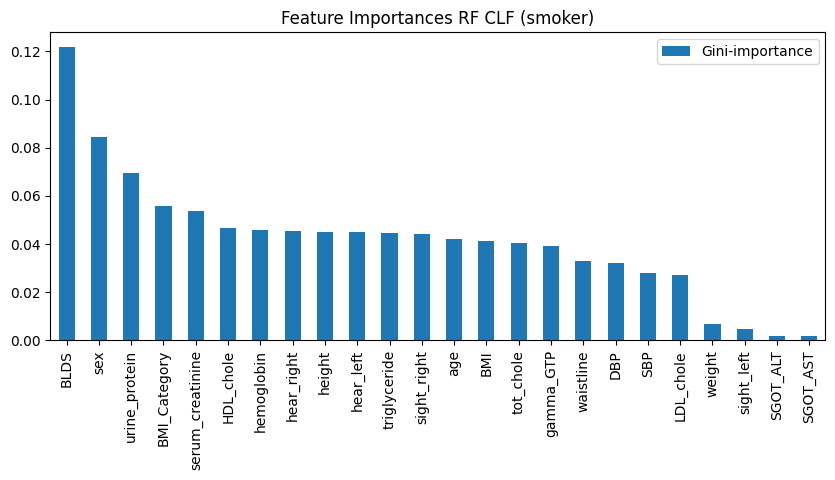

In [ ]:
X = scaled_dataset.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
Y = scaled_dataset["SMK_stat_type_cd"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, Y_train)
feats = {}

smoking_model = {
    RandomForestClassifier : model
    }

# Access and collect feature importances for each individual classifier
for clf_name, clf in smoking_model.items():
  for feature, importance in zip(dataset.columns.difference(["DRK_YN", "SMK_stat_type_cd"]), clf.feature_importances_):
     if feature in feats:
      feats[feature] += importance
     else:
      feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index', columns=['Gini-importance'])

importances = importances.sort_values(by='Gini-importance', ascending=False)
importances.plot(kind='bar', figsize=(10, 4))
plt.title('Feature Importances RF CLF (smoker)')
plt.show()